# Homework 4
---
Here we're just importing all the libraries we'll need.

In [1]:
import numpy as np
import time
import os
import random as rnd
from collections import defaultdict

## 1. Hashing Task!
---
### Bloom Filter class
In this first section of the task we are going to write a Bloom Filter class, i.e. a class representing and implementing everything a bloom filter should be and should do. This will be useful for a more structured as well as a more organized code.

This bloom filter class will have two instance attributes: <code>Bloom_Filter.array</code> and <code>Bloom_Filter.hash_functions</code>. The first will contain the array representing the bloom filter, the second is a list of hash functions which will be used to insert and search elements on the data structure. 

To represent <code>Bloom_Filter.array</code> we're going to use a numpy array instead of a simple Python list. That's because we'll work with very large arrays and numpy is a lot more efficient both in terms of memory and in terms of computational efficiency.

The initializer of the class will take two parameters: the size <code>size</code> of the array representing the bloom filter and the list of hash functions <code>hash_function</code> which will be used to work with the data structure. Both these properties are private and immutable so it will not be possible to change the behaviour of a bloom filter once it is initialized with our class.

In the end the class will have two instance methods: <code>Bloom_Filter.insert(element)</code> and <code>Bloom_Filter.check(element)</code> for inserting and searching items on the bloom filter.

In [2]:
# This class is going to represent a bloom filter, so that we can organize all the implementation and methods
# of the data structure in a single class.
class Bloom_Filter:
    
    # To the constructor we're going to pass the size of the array representing the bloom filter
    # and the list of hash functions that will be used for our methods
    def __init__(self, size, hash_functions):
        self._array = np.empty(size, dtype = bool)
        self._hash_functions = hash_functions
    
    # This function is for adding elements to the bloom filter
    def insert(self, element):
        for function in self._hash_functions:
            self._array[function(element)] = True
            
    # This function is for checking if an element is possibly on the bloom filter or definitely not in it.
    # It returns True if the element is possibly on it, False if it's definetely not on it.
    def check(self, element):
        for function in self._hash_functions:
            if(not self._array[function(element)]):
                return(False)
        return(True)

### Choosing parameters
Since we are going to use a bloom filter for our task, one of the first things we have to do is choosing the size $m$ of the array representing it. We know the folllowing approximate formula to get a reasonable value of $m$ given an error tolerance $p$ as well as the size $n$ of the elements we are going to insert on the set:
$$
    m = -\frac{n \ln{p}}{(\ln{2})^{2}}
$$.

For the error tolerance $p$ we are going to choose the value $0.01$ so that we'll have only a $1\%$ rate of false positives.

To find $n$ we are going to inspect the data we are given. Obviously, since the purpose of the task is to not save all the given passwords in memory, we are going to count the number of passwords **without** saving all of them in memory. To do this we are just going to open our file of passwords and count how many lines it has (since we already know there's a password per line) by using a counter.

In [3]:
passwords = open("passwords1.txt", "r")
# It's worth noting that when Python opens a file it's not going to save it in memory
# so we are not cheating on our task by just opening the file if we don't read it all at once

counter = 0
while(passwords.readline()):
    counter = counter + 1
passwords.close()
print(counter)

100000000


We have found out thar our list consists of $100$ milions passwords. Knowing this we can finally compute $m$ with the formula given above and get
$$
    m = 958505838
$$.

Having established $p$ and $m$ we only need to find the number of hash functions $k$ we're going to code and use for our task. Again, there's a formula with which we'll get $k$ easily:
$$
    k = \frac{m}{n}\ln{2}
$$ and we get
$$
    k = 6.64
$$ so we're going to use seven hash functions.

### Hash functions
This is one critical section. Here we are going to code the hash functions we'll use for our bloom filter. As we have established on the previous sections we are going to code seven of these functions and we'll try to make them as good as we can, meaning that not only they need to be good hash functions, but also independent from each other so to increase the efficiency of our data structure.

A good hash function really depends on the distribution of the elements it's going to convert. That's why, before coding our functions, we're going to insepect our passwords data hoping to find some information about its underlying distribution.

We already know that a password is a string of 20 characters, so we want to find what characters are possibly contained in a password as well as if some characters tend to appear more often than others.

In [4]:
passwords = open("passwords1.txt", "r")

# We're going to save the minimum as well the maximum possible character in our file (characters are ordered by their ASCII code)
minimum = 102
maximum = 102

# We're going to look at only the first 1'000'000 entries of the file so to speed up the process
# implicitly assuming that the underlying distribution is homogenous throughout the file
for _ in range(1000000):
    string = passwords.readline()
    for character in string[:19]: # It's important we get rid of the last character, which is always a "\n"
        if(ord(character) < minimum):
            minimum = ord(character)
        if(ord(character) > maximum):
            maximum = ord(character)

print(minimum, chr(minimum))
print(maximum, chr(maximum))
passwords.close()

33 !
122 z


We see that every password can contain characters ranging from "!" to "z".

We now want to know if any of this character appears more often than the others.

In [5]:
passwords = open("passwords1.txt", "r")

# Here we're going to save how many times a character appears on the file, at position i will be the number of times
# chr(i + 33) appeared
counter = [0] * (122 - 33 + 1)

# Again we're just looking at the first 1'000'000 to speed up the process
for _ in range(1000000):
    string = passwords.readline()
    for character in string[:19]:
        counter[ord(character) - 33] += 1

passwords.close()

In [6]:
counter

[226536,
 226375,
 226357,
 226105,
 226044,
 226000,
 226268,
 226404,
 225767,
 225890,
 225885,
 226388,
 226831,
 225541,
 225986,
 226636,
 225616,
 227077,
 226304,
 227385,
 226377,
 225768,
 226336,
 226474,
 226330,
 226024,
 226416,
 226617,
 226811,
 226216,
 226053,
 226097,
 225798,
 226659,
 225852,
 226279,
 226296,
 226135,
 226755,
 226109,
 226002,
 225869,
 226628,
 225940,
 226091,
 226075,
 225593,
 225928,
 225867,
 226701,
 225958,
 226349,
 226193,
 226762,
 225935,
 226347,
 226287,
 226075,
 0,
 0,
 0,
 0,
 0,
 0,
 226032,
 225611,
 226913,
 226309,
 225951,
 226027,
 225492,
 226486,
 225835,
 225963,
 226979,
 226746,
 225956,
 226440,
 226128,
 225894,
 225349,
 225799,
 226374,
 226345,
 225788,
 225929,
 225759,
 225880,
 226971,
 225647]

Looking at this list we get two useful informations. First of all we see that characters whose ASCII code ranges from 91 ton 96 never appear on the file. Moreover we note that the remaining character appear, approximately, with the same probability in a password.

Based on all these informations we're going to make the following assumption: every password in the file is a randome string where every character is independently drawn in the set of characters whose ASCII code ranges from 33 to 122, excluding those one whose code ranges from 91 to 96.

The efficiency of the algorithms we're going to use will tell us if this has been a reasonable assumption, but for now we stick to it.

#### First hash function

For our first hash function we're going to read every password as a number in base $84$ (the numbers of possible characters appearing in a password) and then take the remainder of the division between this number and $958505838$. This should be a good hash function for the following reason: based on our previous assumption, a password is a number drawn uniformly from $0$ to $84^{20} - 1$. Given a number $x$ such that $0 \leq x < 958505838$ we get that the probability $p(x)$ of getting $x$ from a random password with this function is approximately $\frac{1}{958505838}$.

For now we code a function to get the base 10 value of a character which will be needed to treat every string as a number in base 84.

In [7]:
def get_base_10(character):
    value = ord(character)
    
    # We remember that values ranging from 91 to 96 do not appear
    if(value < 91):
        return(value - 33)
    else:
        return(value - 39)

We are now going to code our first hash function <code>hash_1(string)</code>. Given a string $x_1x_2x_3\cdots x_{20}$ this will represent the number
$$
    x_{1} + x_{2} 84 + x_{3} 84^{2} + \cdots + x_{20} 84^{19}
$$ and what we need is to take the ramainder between this number and $958505838$. To do this we're going to use Horner's method to compute a polynomial, always working $\text{mod } 958505838$.

In [8]:
def hash_1(string):
    value  = 0
    for index in range(len(string) - 1, -1, -1):
        value = (84 * value + get_base_10(string[index])) % 958505838
    return(value)

#### Other hash functions

For the other six hash functions we're going to change a little our first function <code>hash_1</code>. In fact we're going to use exactly this function, but instead of using it in our normal string, we're reordering the characters of the string and apply the function to the result.

To start we're going to define a function to change, in some way, the order of characters in a string. We can't change this order casually, since every hash function must be deterministic. What we do is rotating the characters in a string by a step $s$ and this should be enough to obtain a totally different value from the one resulting from <code>hash_1</code>.

In [9]:
def rotate_string(string, step):
    return(string[step:] + string[:step])

We can now define our other six functions and since they will be all similar we're going to define an high order function which will take as parameters one hash function (in our case <code>hash_1</code>) and a number $k$ and will return our $k$-th hash function.

In [10]:
def hash_function(first_hash_function, k):
    
    # Our k-th hash function will just apply hash_1 to the string rotated by k steps
    return(lambda x : hash_1(rotate_string(x, k - 1)))

We now save all our hash functions in a list so that we can pass it as a parameter when we're going to inizialize our <code>Bloom_Filter</code> class.

In [11]:
hash_functions = [hash_function(hash_1, index + 1) for index in range(7)]

As we have already said at the start of the sections, even if our functions seem to be good hash functions by themselves, it's not guaranteed that they are good hash functions for our bloom filter implementation. It could happen that their result are highly dependent, thus decreasing the efficiency of our structure.

We should find a way to test the independence of our hash functions, but unfortunately it's actually **impossible** that they are exactly independent.

In fact let's suppose for a moment that they are independent. Then taken any seven values $v = (v_{1},\dots, v_{7})$ from $\{0, 1, \dots, 958505838\}$ the probability $p_{(v_{1},\dots, v_{7})}$ of getting $v$ after drawing a random string of $20$ characters subject to our restriction would be
$$
    p_{v_{1}}p_{v_{2}}\cdots p_{v_{7}} = \left(\frac{1}{958505838}\right)^{7} \approx \frac{1}{7 \cdot 10^{62}}
$$ at the same time it would be
$$
    p_{v} = \sum_{s \in S_{v}} p(s)
$$ where $S_{v}$ is the set of strings giving $v$ after applying the seven hash functions. Given $s$ we have
$$
    p(s) = \left(\frac{1}{84}\right)^{20} \approx \frac{1}{3 \cdot 10^{38}}
$$ but this means, by the second equation,
$$
    p_{(v_{1},\dots, v_{7})} \geq \frac{1}{3 \cdot 10^{38}}
$$ which is totally in contrast with our first equation.

Since we have proved that it's impossible to find seven hash functions exactly independent for our purpose, we're going to use the seven functions we have already coded, hoping they will be enough "random" for a good implementation of the bloom filter. The running time of our algorithm will help us finding out if everything works enough fine later.

### The algorithm
We can finally code the algorithm for solving our task. We're going to code the solution in a function for a more organized and structured code.

In [12]:
# The function takes as parameters the name of the file containing the first data set, the name of the file 
# containing the second data set, the size m of the array used to represen the bloom filter and
# the list of hash functions used by the bloom filter

# The function returns the number of strings from the second data set that are possibly contained in the first data set
# and the execution time for finding this number
def task(first_data_set, second_data_set, m, hash_functions):
    
    # We initialize our bloom filter
    bloom_filter = Bloom_Filter(m, hash_functions)
    
    # We add every string in the first data set to the bloom filter
    strings = open(first_data_set, "r")
    start = time.time()
    while(True):
        string = strings.readline()
        if(string == ""):
            break
        string = string[:len(string) - 1] # We need to get rid of the "\n" at the end
        bloom_filter.insert(string)
    strings.close()
    
    # We now check how many strings from the second data set are probably on the first data set
    # and we also create a list containing this possibly duplicates
    strings = open(second_data_set, "r")
    possibly_duplicates = []
    while(True):
        string = strings.readline()
        if(string == ""):
            break
        string = string[:len(string) - 1]
        if(bloom_filter.check(string)):
            possibly_duplicates.append(string)
    end = time.time()
    strings.close()
    
    return((possibly_duplicates, end - start))

We are going to run the function and thus completing our task. Since the algorithm will take a lot of time to execute, we're going to execute it only once and later we'll save our results. Thus we run the algorithm only if there are no results saved (meaning the algorithm has never ran). If we have results stored in the hard disk we're just going to load them.

In [13]:
if(not os.path.isfile("possibly_duplicates.txt")):
    result = task("passwords1.txt", "passwords2.txt", 958505838, hash_functions)
    f = open("possibly_duplicates.txt", "w")
    f.write(str(result[1]) + "\n")
    for password in result[0]:
        f.write(password + "\n")
    f.close()
else:
    f = open("possibly_duplicates.txt", "r")
    result = [[], 0]
    result[1] = float(f.readline())
    while(True):
        string = f.readline()
        if(string == ""):
            break
        string = string[:len(string) - 1]
        result[0].append(string)
    f.close()

# We print the asked results
print('Number of hash functions used: ', len(hash_functions))
print('Number of possibly duplicates: ', len(result[0]))
print('Probability of false positives: 0.01')
print('Execution time: ', result[1])

Number of hash functions used:  7
Number of possibly duplicates:  14261334
Probability of false positives: 0.01
Execution time:  6857.633438587189


### Bonus
Here we are going to count the exact number of false positives we got on the previous task. To do so we're going to use a dictionary and the hash function <code>hash_1</code> in the following way.

We create a dictionary where every entry is a null value or a list of strings based on our list of possibly duplicates. In fact, for every string <code>s</code> in our list, we compute <code>hash_1(s)</code> and add that string to the value associated to key <code>hash_1</code> in our dictionary.

We then iterate over the first data set of passwords and for every password <code>p</code> we check if <code>p</code> is in the value associated to the key <code>hash_1</code> of our dictionary. If the answer is yes we're going to remove that string from the dictionary.

In the end we iterate through <code>hash_duplicates.value()</code> for reamining strings, those will be our false positives.

Assuming that our hash function behaves well (and we hope so based on our discussions in the previous sections) all this process should take an amount of time linear in the size $n = 100000000$ of the first data set, which seems reasonable.

So let's start by creating our array <code>hash_duplicates</code>.

In [15]:
# With this function we create a dictionary and populate it based on data and hash_function
def hash_dictionary(list_of_data, hash_function):
    to_return = defaultdict(list)
    for element in list_of_data:
        to_return[hash_function(element)].append(element)
    return(to_return)

We now create our dictionary of possibly duplicates.

In [16]:
possibly_duplicates_dict = hash_dictionary(result[0], hash_1)

Now the crucial step of this bonus task. We're goint to iterate through all the passwords1.txt file to check what possibly duplicates are effective duplicates. For every password we compute his hash value (always using our <code>hash_1</code> function) and see if that password is in <code>possibly_duplicates_dict[hash_1_value]</code>. If so we remove that string from our dictionary. In the end we collect all the remained strings on the dict.

In [22]:
f = open("passwords1.txt", "r")

while(True):
    string = f.readline()
    if(string == ""):
        break
    string = string[:len(string) - 1]
    hash_value = hash_1(string)
    if(string in possibly_duplicates_dict[hash_value]):
        possibly_duplicates_dict[hash_value].remove(string)

f.close()

false_positives = []
for elements in possibly_duplicates_dict.values():
    false_positives.extend(elements)

print("Number of false positives: " + str(len(false_positives)))

Number of false positives: 261334


We can see that the percentage of false positives is approximately $1.8\%$. This is a bit more than $1\%$ as we initially asked, probably due to the fact that, as we have seen, our hash functions can't be exactly independent.

Still we can consider it a totally solid percentage and thus deduce that our algorithm works pretty well.

## 2. Alphabetical Sort
---
### Counting sort
In this section we're going to code the counting sort algorithm for sorting integers. Counting sort is pretty easy to implement for natural numbers, but we're going to extend it so it can also work with negative numbers, since that's not a too much difficult task.

So, instead of searching the maximum of the array <code>to_sort</code> to be sorted, we're going to search both for the maximum as well for the minimum. This is just slightly more computational expensive, but the algorithm still runs in linear time.

To do so, since of course python arrays can not have negative indexes, we are just going to shift the indexes based on our maximum and minimum.

In [2]:
# The function takes an array of integers as parameter and it returns the sorted array
def counting_sort(to_sort):
    
    # If the array is empty, there's nothing to sort
    if(len(to_sort) == 0):
        return(to_sort)
    
    # First of all we need to look for the maximum and minimum of the array
    maximum = to_sort[0]
    minimum = to_sort[0]
    for index in range(1, len(to_sort)):
        if(to_sort[index] > maximum):
            maximum = to_sort[index]
        if(to_sort[index] < minimum):
            minimum = to_sort[index]
    
    # We now need to create an auxiliary array of size maximum - minimum + 1
    aux_sorting = np.zeros(maximum - minimum + 1, dtype = int)
    
    # Here is the critical step of the algorithm, we're going to iterate through to_sort and for every element s
    # we'll add one to aux_sorting[s - minimum]
    for number in to_sort:
        aux_sorting[number - minimum] += 1
        
    # Here we're finally going to create our sorted array and then return it
    sorted_array = []
    for index in range(len(aux_sorting)):
        for _ in range(aux_sorting[index]):
            sorted_array.append(index + minimum)
    return(sorted_array)

We try the function with some lists to make sure everything works as intended.

In [3]:
to_sort = [1, 2, 3, 4, 5]
counting_sort(to_sort)

[1, 2, 3, 4, 5]

In [4]:
to_sort = [5, 4, 3, 2, 1]
counting_sort(to_sort)

[1, 2, 3, 4, 5]

In [5]:
to_sort = [-3, -7, 0, 9, 5, -1]
counting_sort(to_sort)

[-7, -3, -1, 0, 5, 9]

In [6]:
to_sort = [1001, -20, 201, 0, -1054, 23, 0, 0]
counting_sort(to_sort)

[-1054, -20, 0, 0, 0, 23, 201, 1001]

### Sorting the alphabet
In this section we're going to use counting sort to sort a list containing all the letters of the alphabet.

We start by an easy and crucial observation: even if we're sorting letters and not numbers, we can use the same algorithm just by working with the character codes of the letters instead of the letters themselves.

So the algorithm is going to do the same steps as the previous one, the only difference is that we should first treat characters as numbers and then, when populating our sorted array at the end of the algorithm, we need to convert numbers back again to characters.

This last task (the one of converting numbers back again to characters) is not problematic by itself, but we can work on the algorithm so that we won't need to do it and while this seems useless as of now, it has really good advantages in that we're going to code a lot more general and purpose-wise algorithm.

What we do is we're just going to code our <code>counting_sort</code> function again, but this time it will take a second parameter: <code>key_function</code>, which will be a function to convert elements of the array <code>to_sort</code> into integers. For our particular task we're going to use the <code>ord</code> function.

To make sure we don't need an inverse function to go back from numbers to the original members of the array, we're changing <code>aux_sorting</code> a bit. Instead of it being an array of numbers, it will be an array of tuples in a way that <code>aux_sorting[i]</code> has as first member the member of <code>to_sort</code> which is matched to <code>i</code> by <code>key_function</code> and as second member the counter just like before.

At first it could seems that to correctly initialize <code>aux_sorting</code> this way, we need, for every <code>i</code> to know what element is matched to <code>i</code> by <code>key_function</code>, i.e. it seems we still need an inverse function. But that's not true because we don't need that **for every** <code>i</code> the first member of <code>aux_sorting[i]</code> is correct, but only for the ones we're actually using, i.e. the ones actually belonging to <code>to_sort</code>. This means we can populate <code>aux_sorting</code> during the counter whitout needing any inverse function.

The last thing to note is that <code>key_function</code> should be a one-to-one function, at least when restricted to the elements of <code>to_sort</code>. We can not check this at runtime so we're just going to assume a good coder knows that, just like he should know to put an array of integers on our first counting sort and not an array of floats or boolean.

In [60]:
# This function takes as parameter the array to be sorted and the key function
# Note that the key function is set to the identity function to default, so that the algorithm will still run
# when applied to an array of integers, whitout specifing the key function
def counting_sort(to_sort, key_function = lambda x : x):
    
    # If the array is empty, there's nothing to sort
    if(len(to_sort) == 0):
        return(to_sort)
    
    # To start we creat an int_to_sort array which is just to_sort, but mapped with key_function
    int_to_sort = list(map(key_function, to_sort))
    
    # Now we're going to work with int_to_sort and implementing basically the same counting sort
    # algorithm as before
    
    # First of all we need to look for the maximum and minimum of the array
    maximum = int_to_sort[0]
    minimum = int_to_sort[0]
    for index in range(1, len(int_to_sort)):
        if(int_to_sort[index] > maximum):
            maximum = int_to_sort[index]
        if(int_to_sort[index] < minimum):
            minimum = int_to_sort[index]
    
    # Now we create our auxiliary array, but as we have already said, it will be an array of tuples (of objects for np purposes)
    aux_sorting = np.empty(maximum - minimum + 1, dtype = object)
    
    # Here is the critical step of the algorithm, we're going to iterate through to_sort and for every element s
    # we'll add one to aux_sorting[key(s) - minimum][1], as well as s to aux_sorting[key(s) - minimum][0]
    for index in range(len(int_to_sort)):
        number = int_to_sort[index] - minimum
        element = to_sort[index]
        if(aux_sorting[number] is None):
            aux_sorting[number] = [element, 1]
        else:
            aux_sorting[number][1] += 1
    
    # Here we're finally going to create our sorted array and then return it
    sorted_array = []
    for index in range(len(aux_sorting)):
        if(not aux_sorting[index] is None):
            for _ in range(aux_sorting[index][1]):
                sorted_array.append(aux_sorting[index][0])
    return(sorted_array)

We're now going to try our new function.

First we'll try it with integers arrays whitout passing the <code>key_function</code> parameter to be sure it works as a generalization of our first implementation.

In [61]:
to_sort = [2, 3, 4, 2]
counting_sort(to_sort)

[2, 2, 3, 4]

In [52]:
to_sort = [2, -3, 9, 1, 1, -10]
counting_sort(to_sort)

[-10, -3, 1, 1, 2, 9]

We'll now try with a list containing the letters of the alphabet so to solve our initial task. As we have said at the start of the section we're going to pass the function <code>ord</code> to <code>key_function</code>.

In [53]:
to_sort = ['J', 'G', 'F', 'C', 'W', 'M', 'Z', 'Q', 'S', 'U', 'I', 'T', 'X', 'V', 'R', 'E', 'K', 'D', 'O', 'Y', 'L', 'N', 'A', 'P', 'H', 'B']
counting_sort(to_sort, ord)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

We can already start to see some advantages on the way we coded our function in that it works even if the alphabet is not complete or if there are letters appear more than once.

In [54]:
to_sort = ['H', 'I', 'Z', 'R', 'H', 'D', 'B', 'O']
counting_sort(to_sort, ord)

['B', 'D', 'H', 'H', 'I', 'O', 'R', 'Z']

In fact our function works not only with letters of the alphabet, but with characters of any kind, as long as we want them to be sorted by their ASCII code.

In [55]:
to_sort = ['?', '(', 'b', '3', '-', '4', 'A', '?']
counting_sort(to_sort, ord)

['(', '-', '3', '4', '?', '?', 'A', 'b']

As a last example of how much our function can be versatile, we see that it can be used to sort a list of tuples by one of their coordinate.

In [56]:
to_sort = [('Rome', 'Italy', 2872), ('Paris', 'France', 2141), ('Los Angeles', 'USA', 3990), ('Beijing', 'China', 21542)]
counting_sort(to_sort, lambda x : x[2])

[('Paris', 'France', 2141),
 ('Rome', 'Italy', 2872),
 ('Los Angeles', 'USA', 3990),
 ('Beijing', 'China', 21542)]

### Sorting words
It's time for the last algorithm of this task. Here we want to implement a variant of counting sort to sort list of words. Anyway there's not any variant to code, since we're going to use exactly our last function <code>counting_sort(to_sort, key_function)</code> with an appropriate choice of <code>key_function</code>.

In fact if we find a function $f$ that given a word $s$ it returns an int $f(s)$ in such a way that if $s_{1}$ comes before $s_{2}$ in alphabetical order than $f(s_{1}) < f(s_{2})$ we can just use our couting sort function whitout having to change anything. So let's just look for this function $f$.

It turns out that what we can do is to treat words like numbers in a different base, knowing the maximum lenght of a word is a fixed number $m$. Since the letters of the alphabet are $26$ we're going to treat words like numbers in base $27$, where the character " " (space) stands for zero (this will help us with multiword strings).

Let's see how this work in more detail and why it works fine. Pick two words $s = s_{n}s_{n - 1}\dots s_{1}$ and $t = t_{r}t_{r - 1}\dots t_{1}$. First of all we're going to add at the end of the words as many spaces character as are needed to be sure both words have length exactly $m$. So, treating the space character as zero, we have $s = s_{n}s_{n - 1} \dots s_{1}0\dots0$ and $t = t_{r}t_{r - 1}\dots t_{1}0 \dots 0$. Treating these words as numbers in base $27$ and converting them to base $10$ we get:
$$
    s = s_{n} \cdot 27^{m} + s_{n - 1} \cdot 27^{m - 1} + \cdots \\
    t = t_{r} \cdot 27^{m} + t_{r - 1} \cdot 27^{m - 1} + \cdots
$$.

Now it's clear that if $s_{n}$ comes before $t_{r}$ in alphabetical order, than $s < t$ since being both $s_{i}, t_{i} < 27$ for every $i$, what comes after $s_{n} \cdot 27^{m}$ and $t_{r} \cdot 27^{m}$ can't be bigger than these two terms, which will then dominate the ordering. If $s_{n} = t_{r}$ than we can pass to $s_{n - 1}$ and $t_{r - 1}$ and the same reasoning applies.

If the first characters of both words are always equal before finding a character space we can also see that the smaller word in terms of lenght come before the other one, just like intended. In the same way we can see that this method work fine also for multiword strings.

We have found our requested function $f$ theoretically speaking, now we just need to code it and that's what we will do right now. Just like we did on the first task for our hash function, to convert a word in base $10$ we're going to use Horner's method.

In [57]:
# The function takes two parameters: the word to be converted to base 10 and the maximum lenght m which is needed
# base on the previous discussion to order the list correctly
def word_to_base_10(word, max_lenght):
    
    # first of all we're going to work with not capital letters
    low_word = word.lower()
    
    # We then complete the word with spaces if needed
    low_word = low_word + " " * (max_lenght - len(low_word))
    
    # We apply Horner's method to change base
    value = 0
    for index in range(len(low_word)):
        single_char = 0
        # We use ASCII code to get the base 10 value of a letter knowing that not capital letters
        # start from 97
        if(low_word[index] != ' '):
            single_char = ord(low_word[index]) - 96
        value = 27 * value + single_char
    return(value)

Now to use our counting sort function for arrays of words all we just need to pass <code>word_to_base_10</code> to <code>key_function</code> parameter. This is actually not directly possible since in our counting sort implementation we assume <code>key_function</code> to take a single parameter, while <code>word_to_base_10</code> takes two of them. The problem can be easily solved with lambda functions, but for a more organized code we're going to code one more high order function.

In [58]:
def word_to_base_10_function(max_lenght):
    return(lambda x : word_to_base_10(x, max_lenght))

We're finally ready to try out our algorithm.

In [25]:
to_sort = ["To", "Ten", "And", "Eye", "Bat", "Dog", "Two", "Go", "Bee"]
counting_sort(to_sort, word_to_base_10_function(3))

['And', 'Bat', 'Bee', 'Dog', 'Eye', 'Go', 'Ten', 'To', 'Two']

In [26]:
to_sort = ["As", "Cat", "Like", "Be", "Zero", "Rise", "Then", "Nose", "Than", "Hand", "Love"]
counting_sort(to_sort, word_to_base_10_function(4))

['As',
 'Be',
 'Cat',
 'Hand',
 'Like',
 'Love',
 'Nose',
 'Rise',
 'Than',
 'Then',
 'Zero']

In [27]:
to_sort = ["Light", "Short", "Shirt", "To do", "Air", "Mouse", "Sing", "While", "Room", "Lazy", "Tooth", "To be"]
counting_sort(to_sort, word_to_base_10_function(5))

['Air',
 'Lazy',
 'Light',
 'Mouse',
 'Room',
 'Shirt',
 'Short',
 'Sing',
 'To be',
 'To do',
 'Tooth',
 'While']

In [28]:
to_sort = ["Secure", "Get up", "Greedy", "Poison", "Both", "Random", "Laptop", "Ill", "List", "Mirror", "Ready", "Steady"]
counting_sort(to_sort, word_to_base_10_function(6))

['Both',
 'Get up',
 'Greedy',
 'Ill',
 'Laptop',
 'List',
 'Mirror',
 'Poison',
 'Random',
 'Ready',
 'Secure',
 'Steady']

Everything works great!
### Time complexity
Here we're going to discuss about time complexity of the counting sort algorithm we have coded. We'll start by doing that theoretically and then we'll do some empirical tries. We're going to use asymptotic notation and calculus, ignoring constants for the sake of simplicity.


The first step of the algorithm is to convert the array <code>to_sort</code> into a new array using the function <code>key_function</code>. Let's say that $n$ is the size of <code>to_sort</code> and $\Theta_{k}(m)$ is the time complexity of <code>key_function</code> where $m$ is a measure of the size of a single element of <code>to_sort</code> (since we're still analysing the algorithm in general terms we can't exactly say the value of $\Theta_{k}(m)$ or what $m$ concretely represents). So the first step takes time (in the worst case that every element of the array to sort has exactly measure $m$):
$$
    \Theta_{1}(n, m) = n\Theta_{k}(m)
$$.

Next the algorithm look for the minimum as well for the maximum of the new array, and that clearly takes time:
$$
    \Theta_{2}(n, m) = n
$$.

The third step is critical. We initialize a new array (the auxiliary one) and this takes time linear in its size. What the size of the new array is depends on our <code>key_function</code> so for now we're going to use a third variable $r$. This third step then takes time:
$$
    \Theta_{3}(n, m, r) = r
$$.

We then iterate through all the first array and this takes time:
$$
    \Theta_{4}(n, m, r) = n
$$.

In the end we iterate through all the auxiliary array and by doing so we're going to populate our new sorted array, which has lenght $n$, so for our last step we have:
$$
    \Theta_{5}(n, m, r) = r + n
$$.

Putting everything together we have that counting sort has time complexity:
$$
    \Theta(n, m, r) = n\Theta_{k}(m) + n + r + n + r + n = n\Theta_{k}(m) + \Theta(n + r)
$$.

We see that even if the algorithm is linear in $n$, it can depends on other factors and measures that could potentially increase a lot its time complexity (and in fact we're going to see exactly this later on).

Now let's see how this abstract formula applies to our specific cases, starting with counting sort applied to lists of integers. In this case <code>key_function</code> is just the identity function, so it's time complexity is of course constant $\Theta_{k}(m) = 1$ ($m$ doesn't really makes sense as a variable here). Morevore we can see that $r$ is the difference between the maximum and minimum of the array, which we're going to call his range. So the time complexity of the counting sort algorithm is:
$$
    \Theta(n, r) = n + \Theta(n + r) = \Theta(n + r)
$$.

We can thus deduce that the time complexity increases linearly both depending on the size of the array as well as on his range. If the size and the range are enough close this results in a efficient algorithm, but it could happen that the range is much bigger than the size and then other algorithms could be better.

Let's move on to counting sort applied to lists containing all the letters of the alphabet (but in an unordere way). The <code>key_function</code> here is the <code>ord</code> function, which is again constant so, again, $\Theta_{k}(m) = 1$ (and againg $m$ does not make sense here as a measure of anything). In this case, moreover, the range of the function is equal to his size (both are $26$), so $n = r$. In the end we have as time complexity:
$$
    \Theta(n)
$$. We could argue that in this case we know how big $n$ is so we could compute an explicit number for the time complexity, but that's not really needed. In the end the algorithm is pretty fast as the next empirical test shows.

In [29]:
to_sort = ['H', 'G', 'V', 'P', 'F', 'M', 'K', 'X', 'A', 'E', 'T', 'I', 'D', 'W', 'O', 'U', 'Z', 'Q', 'R', 'J', 'L', 'N', 'S', 'C', 'B', 'Y']
start = time.time()
counting_sort(to_sort, ord)
end = time.time()
print(end - start)

0.0


The algorithm runs in less than $0.05$ seconds, which is a totally reasonable amount of time.

In the end let's see how our algorithm behaves when sorting a list of words. In this case we're going to put $m$ equal to the maximum lenght of the words to be sorted. Here <code>key_function</code> is <code>word_to_base_10</code>, which is easy to see having time complexity $\Theta_{k}(m) = \Theta(m)$. When looking at $r$ is where things get problematic. We can not say exactly how much $r$ is compared to $n$ and $m$, but let's see what happens in the worst scenario. This is when the array contains both the word of lenght $m$ with the maximum possible value in base $10$, as well as the word with the minimum possible value. The maximum one is $zz\dots z$, which, converted to base $10$, is equal to $27^{m} - 1$. Yhe minimum one is $a$, which, converted to base $10$, is equal to $1$. So here the range is $r = 27^{m} - 1 -1 = 27^{m} - 2$. Finally the time complexity of the algorithm is then:
$$
    \Theta(n, m) = n\Theta_{k}(m) + \Theta(n + 27^{m} - 2) = \Theta(nm) + \Theta(n + 27^{m}) = \Theta(n + 27^{m})
$$.

The $\Theta(27^{m})$ term is simply horrible. It increases way way faster than any reasonable function. Even when $m$ is low (like $m = 3$) it contributes to the running time with an unnecessary constant factor. When $m$ is greater than $3$ the algorithm already starts to be too much slow.

In general the algorithm is bad in terms of time complexity. We could argue two things: first that the running time is bad in the worst case, but could be better in other situations and second that $n$ could be so big that it's the same order of $27^{m}$ and so it reamins a better choice than other algorithms like quick sort, which have a time complexity of $\Theta(n\ln n)$.

Well, that's not the case, in both scenarios. In fact even if the array to be sorted does not contain the maximum and minimum possible word of lenght $m$, it's extremely unlikey that it does not contain at least two words starting with different letters. And if that's the case it's easy to see that the range $r$ is at least $27^{m - 1}$ which is still a really bad time complexity.

Second it's highly unlikely that $n$ is greater than $27^{m}$. Just for example let's imagine we want to sort all the english words. There are english words with a lot of letters, but let's assume that no word goes beyond $7$ characters. This gives us a range of the order of $10^9$. The english words are estimated to be a number of the order of $10^{6}$. So we see that $n$ is highly smaller than $r$ and we repeat that we chose a maximum lenght $m$ smaller than what it really is.

There's one last argument that could be considered. Maybe the algorithm is not bad by itself, but the choice of our <code>key_function</code> is and that's what brings a so big range $r$. But still, if we don't make any assumption on the words that could happen to be sorted, that's false. In fact whitouth any assumption it could happen that we find ourselves sorting all the possible words (even the ones without any meaning) of lenght $m$. For the algorithm to work properly we need that every word is mapped to a unique integer by our <code>key_function</code>. Since there are at least $26^{m}$ of these words (we're even not counting spaces and words with lenght smaller than $m$), we would need a range $r$ of at least $26^{m}$. So we see that our function is not really improvable to bring us to a smaller $r$.

In the end let's test the time complexity of the algorithm empirically and see more concretely how bad it is. We're going to implement a function for this.

In [14]:
# The function takes as parameter an int max_lenght and returns a random word having that lenght
# (a random word, not necessarily an english word)
def random_word(max_lenght):
    string = ""
    for _ in range(max_lenght):
        string = string + chr(rnd.randint(97, 122))
    return(string)

# The function takes as parameters the maximum lenght of words to be sorted and the number of them
# it returns the runtime the algorithm counting sort takes to accomplish the goal
def try_counting_sort(max_lenght_of_words, number_of_words):
    
    # Create a random list of words
    to_sort = []
    for _ in range(number_of_words):
        to_sort.append(random_word(max_lenght_of_words))
    
    # Start counting runtime
    start = time.time()
    counting_sort(to_sort, word_to_base_10_function(max_lenght_of_words))
    end = time.time()
    
    # Show the result
    print("Runtime of the algorithm counting sort for sorting " + str(number_of_words) + " words of max lenght " + str(max_lenght_of_words) + " is " + str(end - start))

Now we're going to do our tests.

In [70]:
for m in range(3, 7, 1):
    if(m == 3):
        print("m = 3")
    else:
        print("\nm = " + str(m))
    try_counting_sort(m, 10)
    try_counting_sort(m, 200)
    try_counting_sort(m, 1000)

m = 3
Runtime of the algorithm counting sort for sorting 10 words of max lenght 3 is 0.0010004043579101562
Runtime of the algorithm counting sort for sorting 200 words of max lenght 3 is 0.0020008087158203125
Runtime of the algorithm counting sort for sorting 1000 words of max lenght 3 is 0.005001068115234375

m = 4
Runtime of the algorithm counting sort for sorting 10 words of max lenght 4 is 0.042009592056274414
Runtime of the algorithm counting sort for sorting 200 words of max lenght 4 is 0.04801011085510254
Runtime of the algorithm counting sort for sorting 1000 words of max lenght 4 is 0.04901123046875

m = 5
Runtime of the algorithm counting sort for sorting 10 words of max lenght 5 is 1.2312774658203125
Runtime of the algorithm counting sort for sorting 200 words of max lenght 5 is 1.1992616653442383
Runtime of the algorithm counting sort for sorting 1000 words of max lenght 5 is 1.2608697414398193

m = 6
Runtime of the algorithm counting sort for sorting 10 words of max lenght

## 3. Find similar wines!
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

## Importing Dataframe
**Source:**
<br>
__Original Owners:__
<br>Forina, M. et al, PARVUS - 
<br>An Extendible Package for Data Exploration, Classification and Correlation. 
<br>Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 
<br>16147 Genoa, Italy.
<br>
__Donor:__
<br>Stefan Aeberhard, email: <u>stefan <b>'@'</b> coral.cs.jcu.edu.au</u></p>


**Data Set Information:**
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.
<br>
The __attributes__ are (dontated by Riccardo Leardi):
+ Alcohol
+ Malic acid
+ Ash
+ Alcalinity of ash  
+ Magnesium
+ Total phenols
+ Flavanoids
+ Nonflavanoid phenols
+ Proanthocyanins
+ Color intensity
+ Hue
+ OD280/OD315 of diluted wines
+ Proline 
<br>
**Attribute Information:**
+ All attributes are continuous
+ No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)
<br>

NOTE: 1st attribute is class identifier (1-3)

**Class Distribution** (number of instances per class):

+ class 1: 59
+ class 2: 71
+ class 3: 48

In [2]:
wine_dataframe = pd.read_csv('wine.data', names=['Class','Alcohol', 'Malic acid',
                                       'Ash', 'Alcalinity of ash', 'Magnesium',
                                       'Total phenols','Flavanoids', 'Nonflavanoid phenols',
                                       'Proanthocyanins', 'Color intensity','Hue',
                                       'OD280/OD315 of diluted wines', 'Proline'])

In [3]:
wine = wine_dataframe[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                       'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                       'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']]

## k-means Algorithms
Let $X = \{x_1, \ldots , x_n\}$ be a set of $n$ data points, each with dimension $d$. The k-means problem seeks to find a set of k means $M = \{\mu_1, \ldots , \mu_k\}$ which minimizes the function
$$
f(M) = \sum _{\mathbf {x} \in X} {\underset {\mathbf {\mu \in M} }{\operatorname {min} }}\; \left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}
$$

In other words, we wish to choose k means so as to minimize the sum of the squared distances between each point in the dataset and the mean closest to that point.

#### Standard k-means
The standard algorithm for solving k-means uses an iterative process which guarantees a decrease in total error (value of the objective function $f(M)$) on each step. The algorithm is as follows:
1. Choose k initial means $\mu_1, \ldots, \mu_k$ uniformly at random from the set $X$.
2. For each point $x \in X$, find the closest mean $\mu_i$ and add $x$ to a set $S_i$.
3. For $i = 1, \ldots , k$, set $\mu_i$ to be the centroid of the points in $S_i$.
4. Repeat steps 2 and 3 until the means have converged.

The convergence criterion for step 4 is typically when the total error stops changing between steps, in which case a local optimum of the objective function has been reached. However, some implementations terminate the search when the change in error between iterations drops below a certain threshold. Each iteration of this standard algorithm takes time $O(nkd)$. In principle, the number of iterations required for the algorithm to fully converge can be very large, but on real datasets the algorithm typically converges in at most a few dozen iterations.

In [4]:
def euc_dist(x, y):
    """
    Euclidean distance.
    """
    return np.sqrt(((x - y) ** 2).sum())

In [5]:
def kCluster(M, k):
    """
    :param M: pandas dataframe with data for clustering
    :type M: pandas.DataFrame
    :param k: number of clusters
    :type k: int
    :return: pandas dataframe M + columns "Cluster" with number of cluster
    """
    m = M.shape[0]
    random.seed(1234)
    rdm = random.sample(range(m), k)
    centroids = {c: M.iloc[rdm[c]] for c in range(k)}
    clusters = {c: [] for c in centroids}
    
    def clusters_update():
        """
        Function that assigns each point to a cluster (S_i)
        """
        clusters_temp = {c: [] for c in centroids}
        for i in range(m):
            dist = {euc_dist(M.iloc[i], centroids[j]): j for j in range(k)}
            clusters_temp[dist[min(dist)]].append(i)
        return clusters_temp
    
    def centroids_update():
        """
        Function that calculates the center of the cluster
        """
        centroids_temp = {c: M.iloc[clusters[c]].mean().round(decimals=2) for c in range(k)}
        return centroids_temp
   
    while True:
        clusters = clusters_update()
        centroids_temp = centroids_update()
        if all([all(centroids[c].values == centroids_temp[c].values) for c in range(k)]):
             break
        else:
            centroids = centroids_temp
            
    for i in range(k):
        M.loc[clusters[i], 'Cluster'] = i + 1
    M['Cluster'] = M['Cluster'].astype(int)
    
    return M[['Cluster','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                      'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                      'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']]

In [6]:
"""
Divide the 'wine' dataset into 'k=3' clusters
"""
cluster = kCluster(wine, 3)

In [7]:
"""
Print the number of elements of each cluster
"""
print('Cluster 1: ' + str(len(cluster[cluster['Cluster'] == 1])) + '\n' +
      'Cluster 2: ' + str(len(cluster[cluster['Cluster'] == 2])) + '\n' +
      'Cluster 3: ' + str(len(cluster[cluster['Cluster'] == 3])))

Cluster 1: 100
Cluster 2: 50
Cluster 3: 28


We can see that the number of the elements of each cluster (we got by using the algorithm k-means) is different compared with the starting division into classes of the dataframe “wine_daraframe”. Of course, repeating the algorithm many times, the number of elements can be different since the starting centroids are causal.

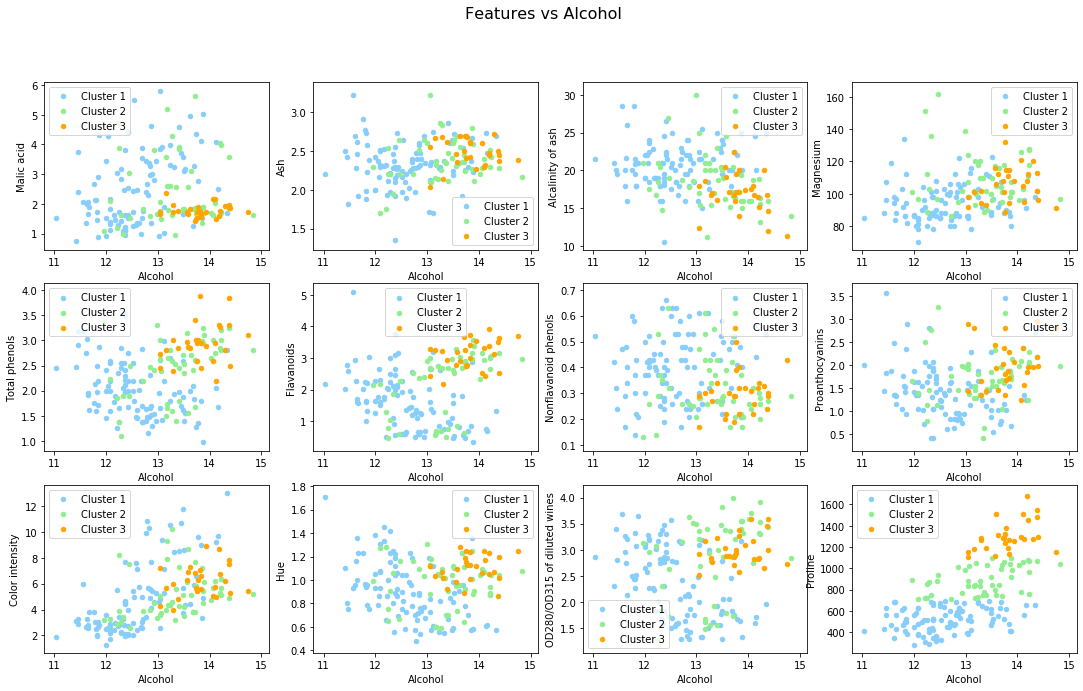

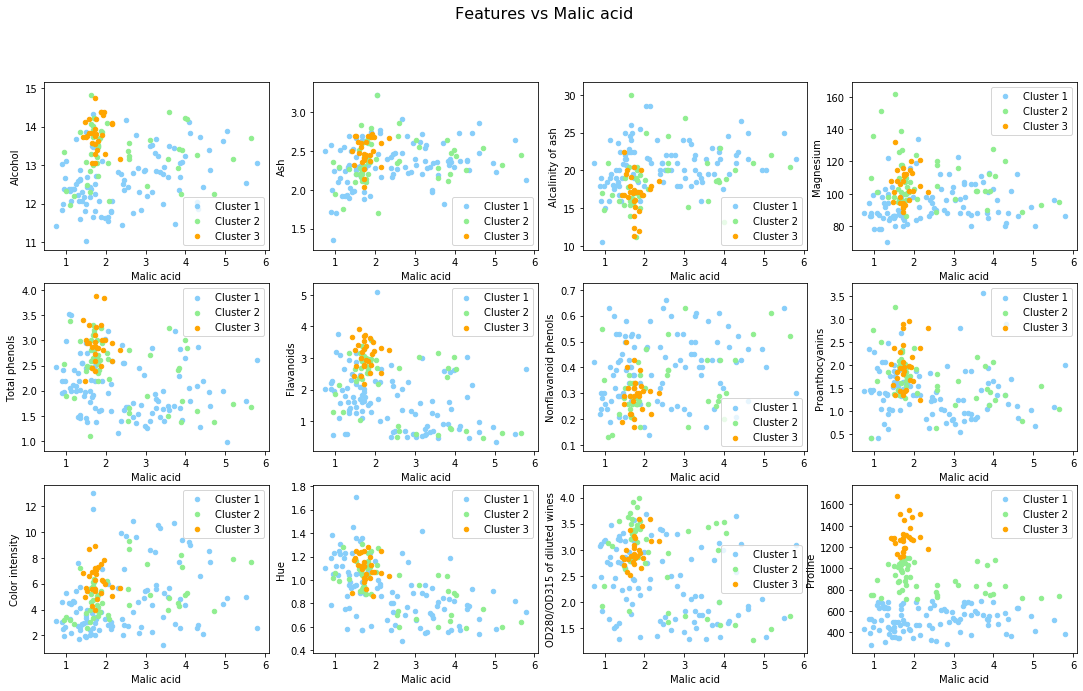

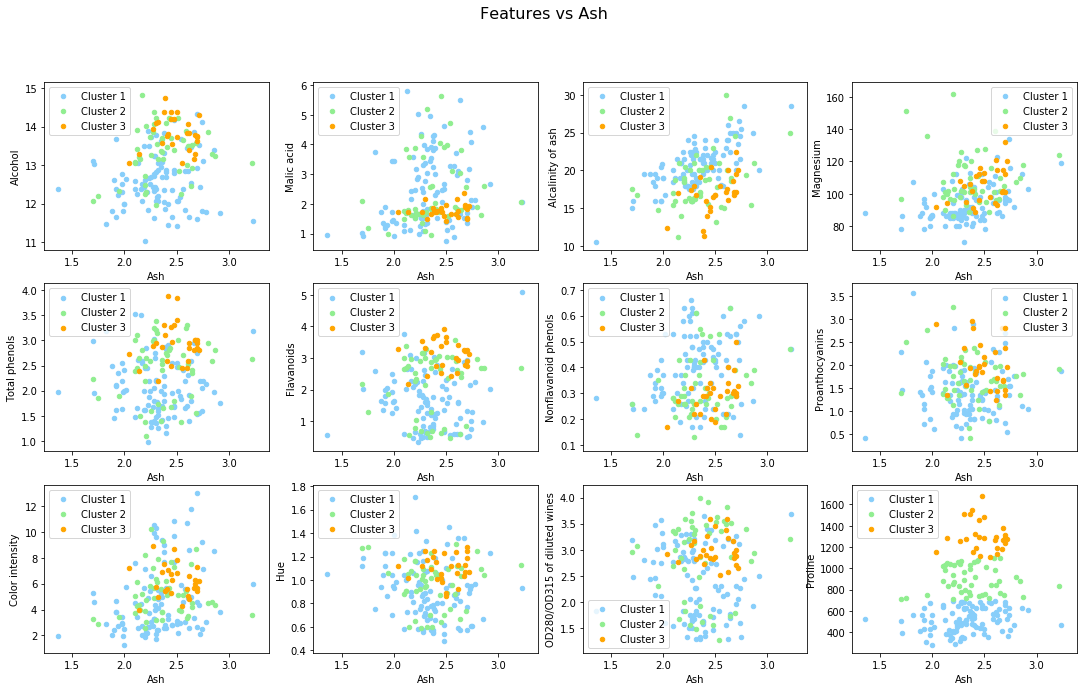

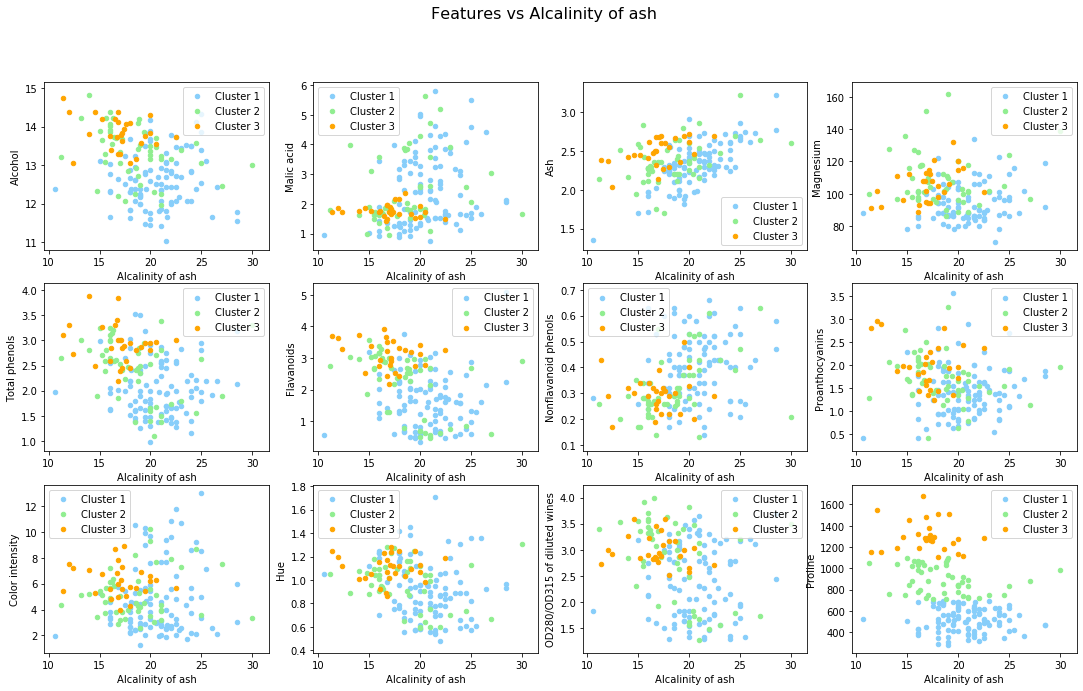

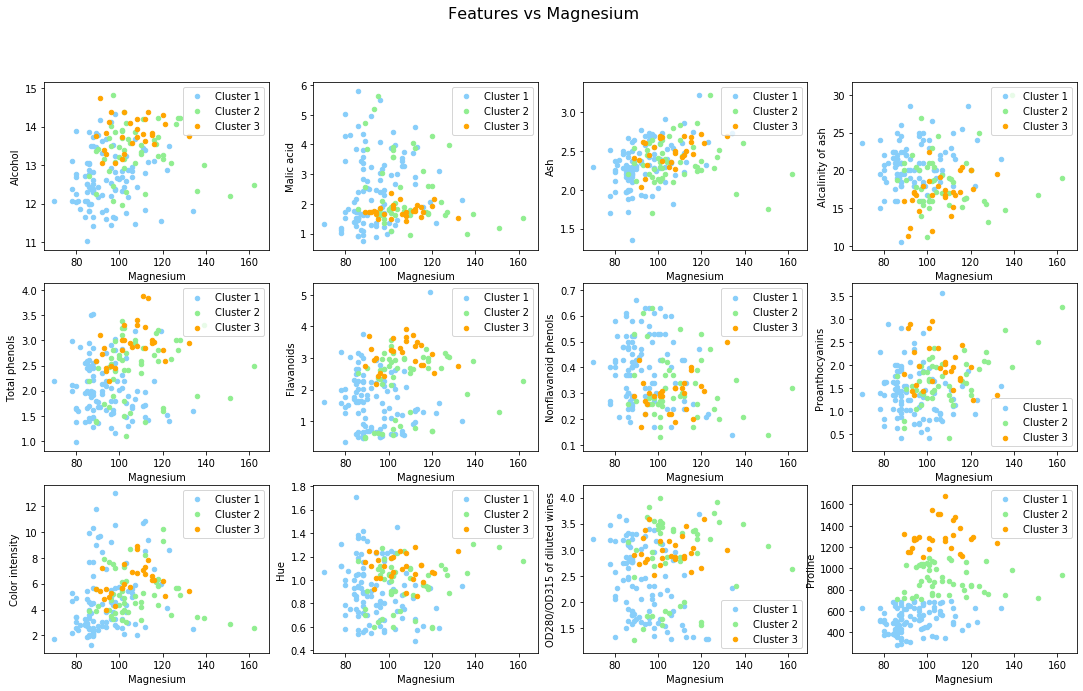

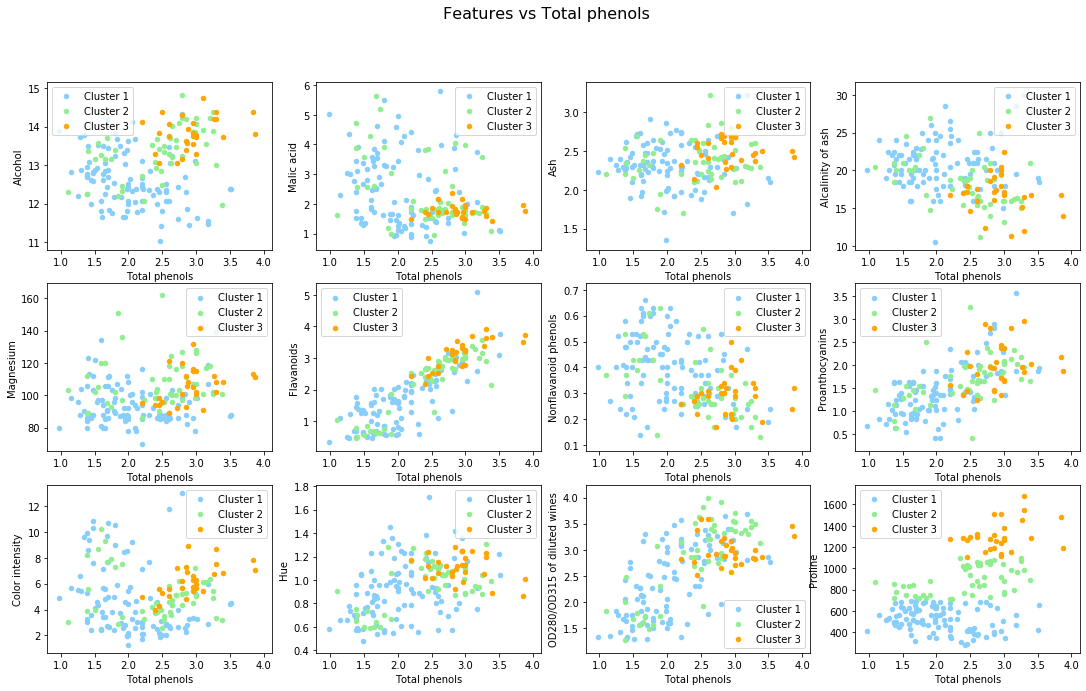

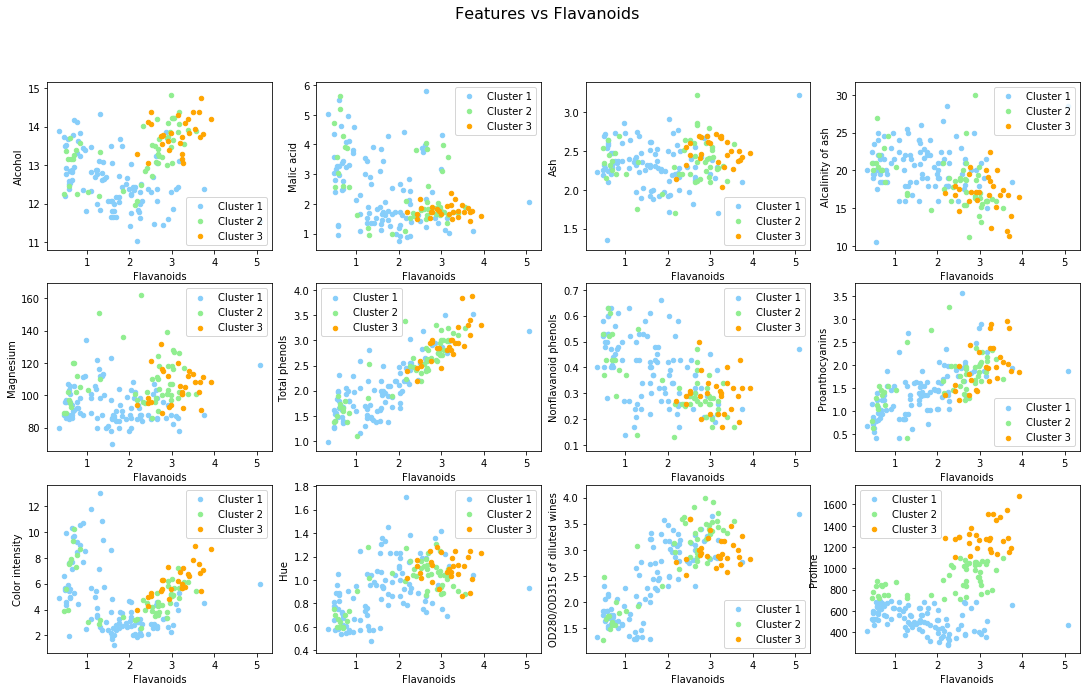

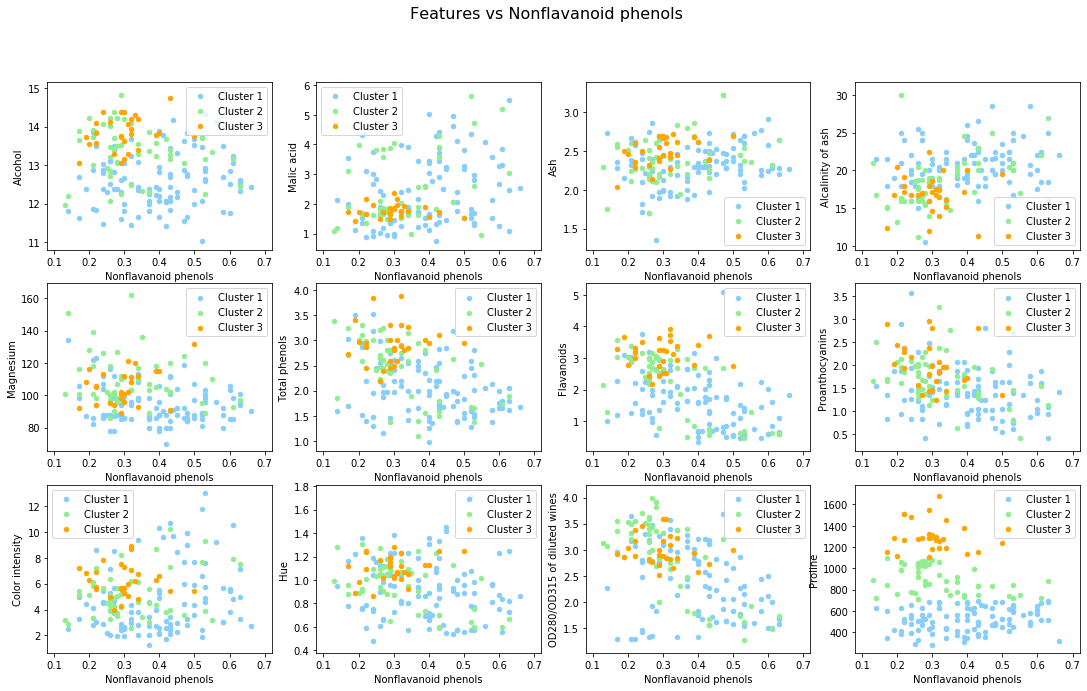

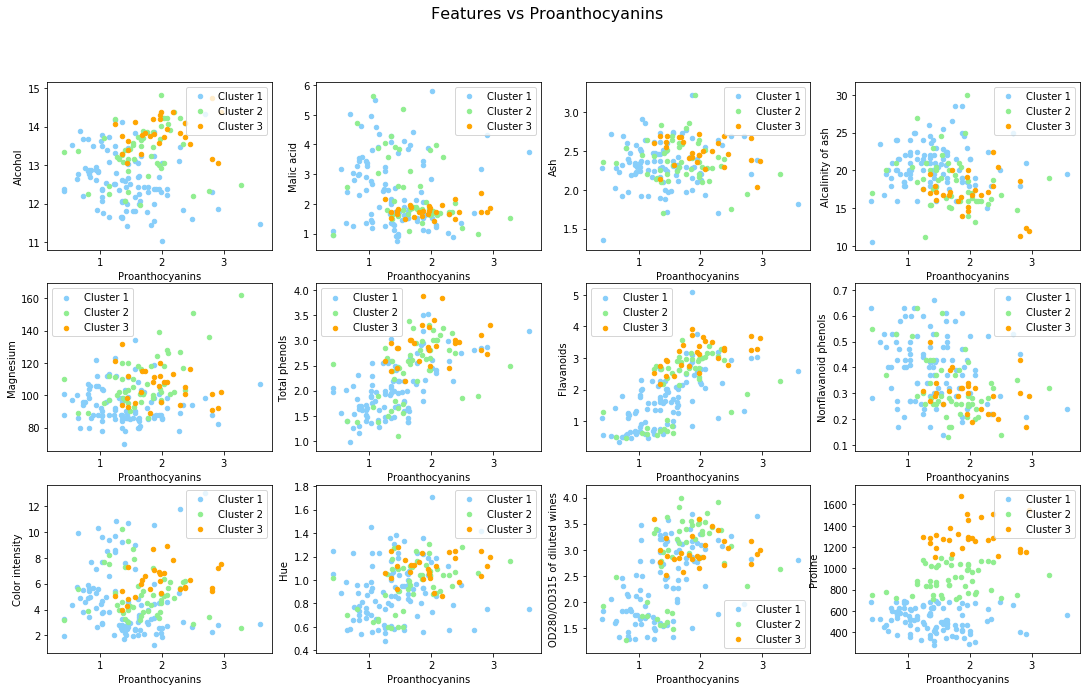

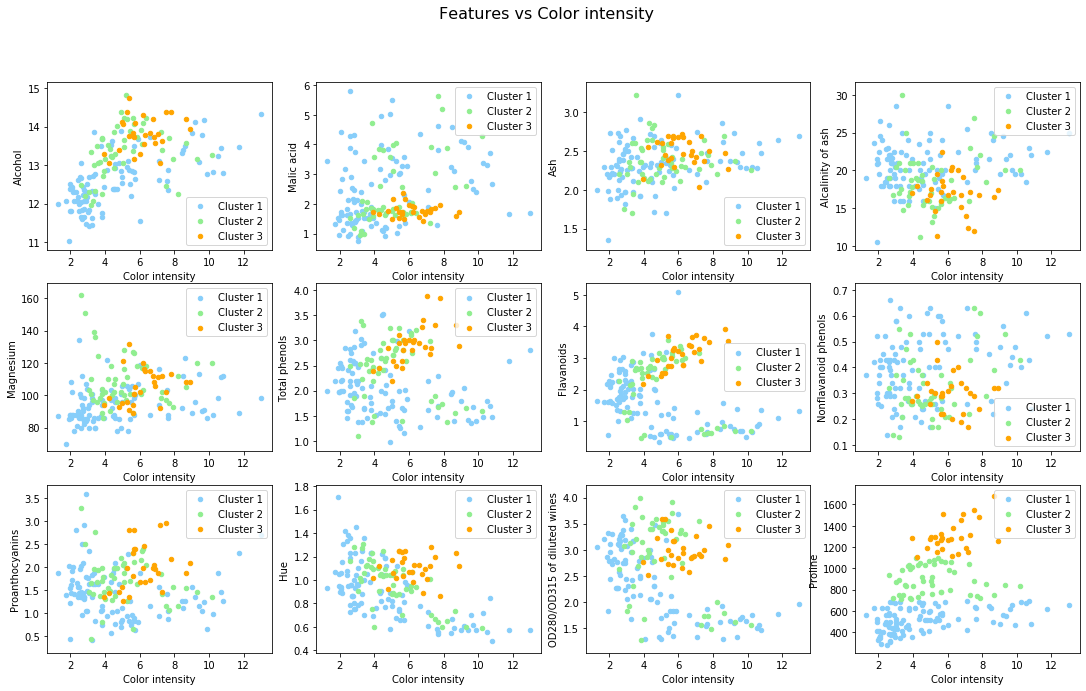

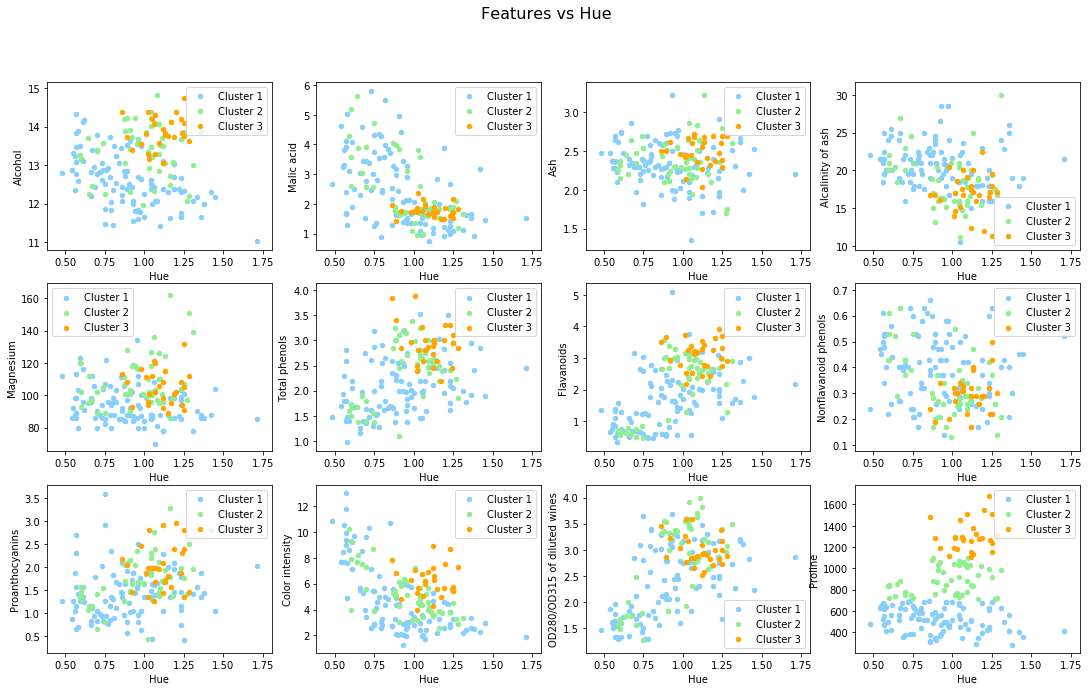

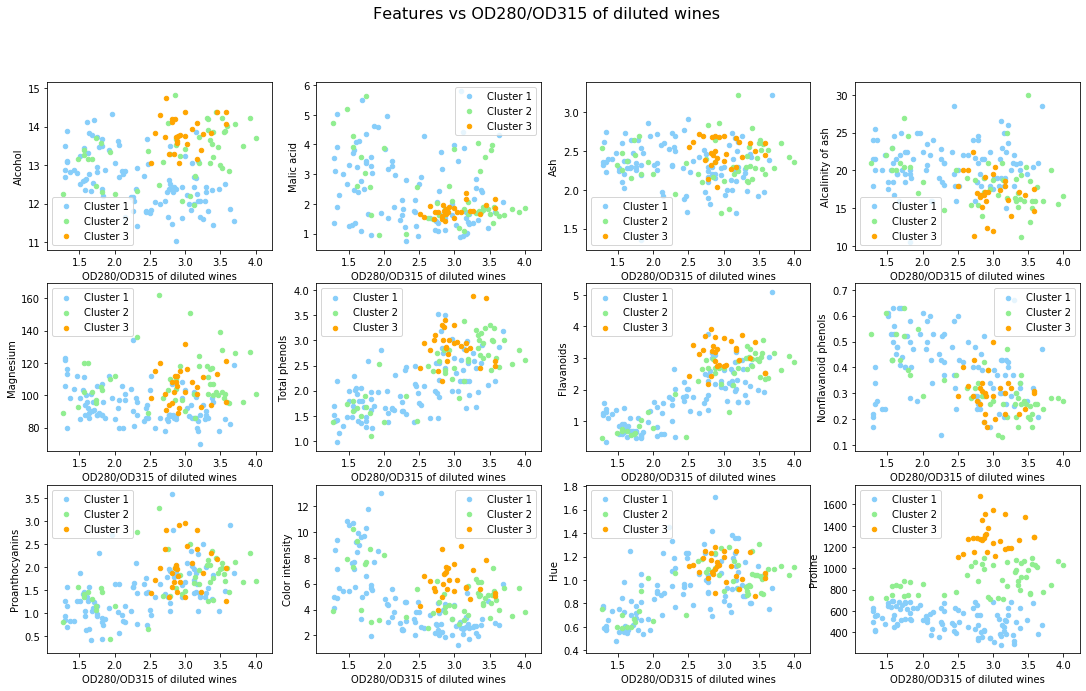

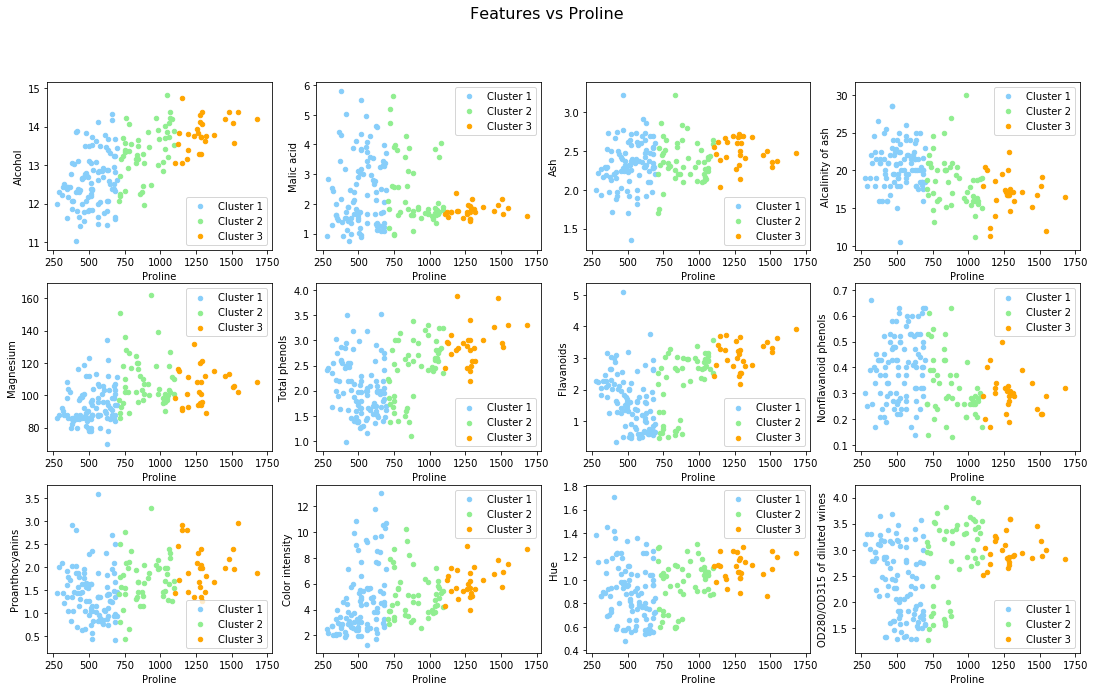

In [8]:
"""
Plot the distribution of the different features
"""

features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']

for feature in features:
    fig, axes = plt.subplots(nrows=3, ncols=4)
    i = 0
    for vs_feature in features:
        if vs_feature == feature:
            pass
        else:
            cluster[cluster['Cluster']==1].plot(kind='scatter', x=feature, y=vs_feature, color='lightskyblue', label='Cluster 1', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==2].plot(kind='scatter', x=feature, y=vs_feature, color='lightgreen', label='Cluster 2', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==3].plot(kind='scatter', x=feature, y=vs_feature, color='orange', label='Cluster 3', ax=axes[i//4,i%4])
            i += 1
            
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle('Features vs '+ feature, fontsize=16)
    plt.show()

In this way we achieve a clusters division that we can consider "perfect" comparing the “Proline” with all of the features. So we can say that the “proline” is an important feature we need to divide in clusters using the algorithm k-means for the data frame “wine”. And also, repeating the algorithm the “proline” is always an important feature as we can observe.

In [9]:
del wine['Cluster']

Right now we reduce all of the features into the range $[0,1]$, then we apply again the k-means in order to understand if important features change.


In [10]:
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']
for feature in features:
    m = wine[feature].min()
    M = wine[feature].max()
    wine.loc[:,feature] = wine.loc[:,feature].apply(lambda c: (c-m)/(M-m))

In [11]:
"""
Divide the 'wine' dataset into 'k=3' clusters
"""
cluster = kCluster(wine, 3)

In [12]:
"""
Print the number of elements of each cluster
"""
print('Cluster 1: ' + str(len(cluster[cluster['Cluster'] == 1])) + '\n' +
      'Cluster 2: ' + str(len(cluster[cluster['Cluster'] == 2])) + '\n' +
      'Cluster 3: ' + str(len(cluster[cluster['Cluster'] == 3])))

Cluster 1: 55
Cluster 2: 61
Cluster 3: 62


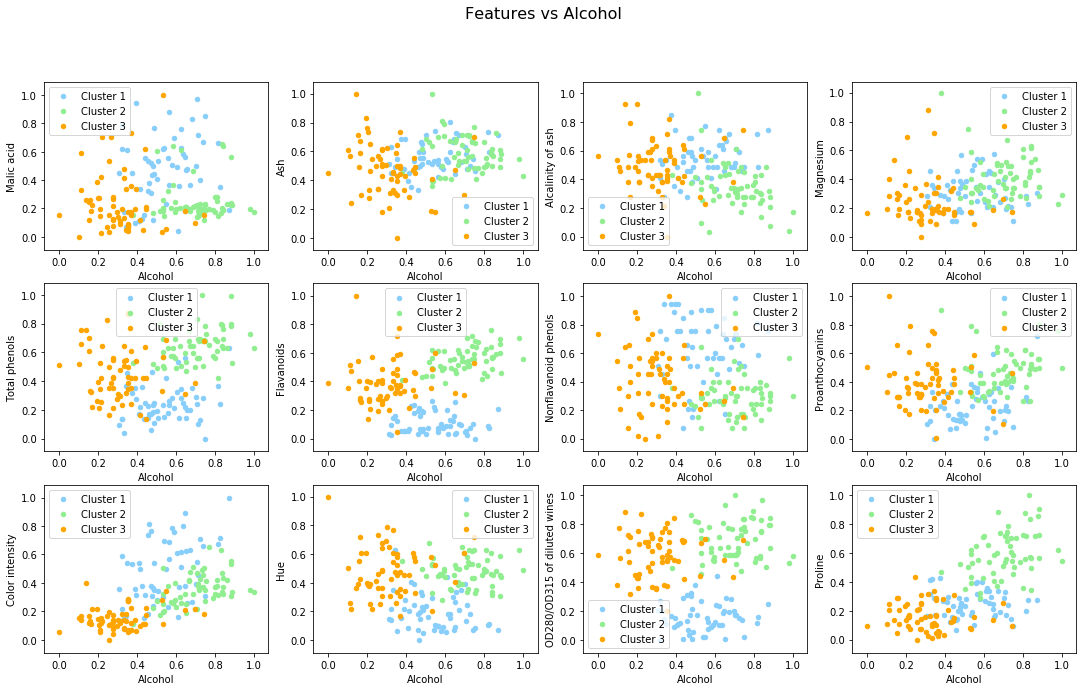

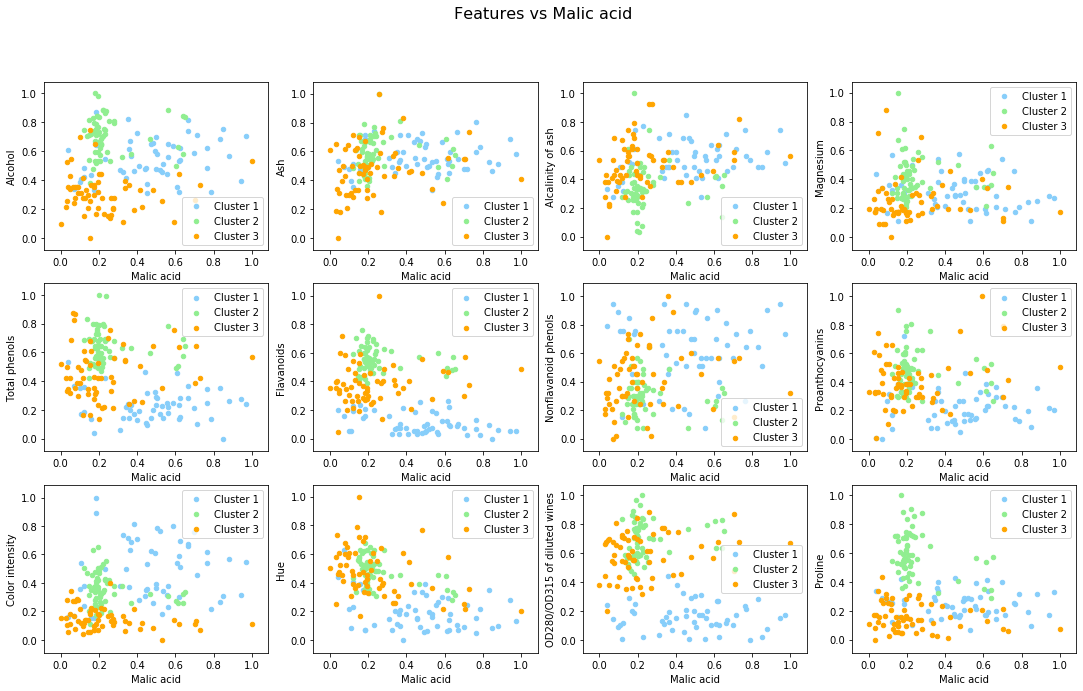

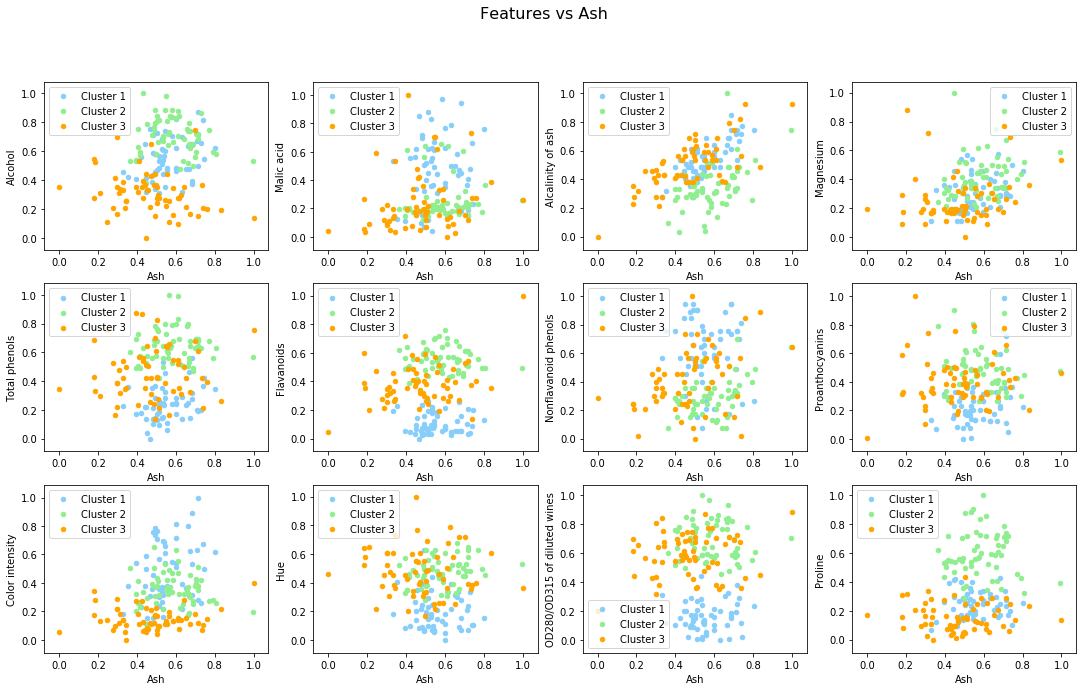

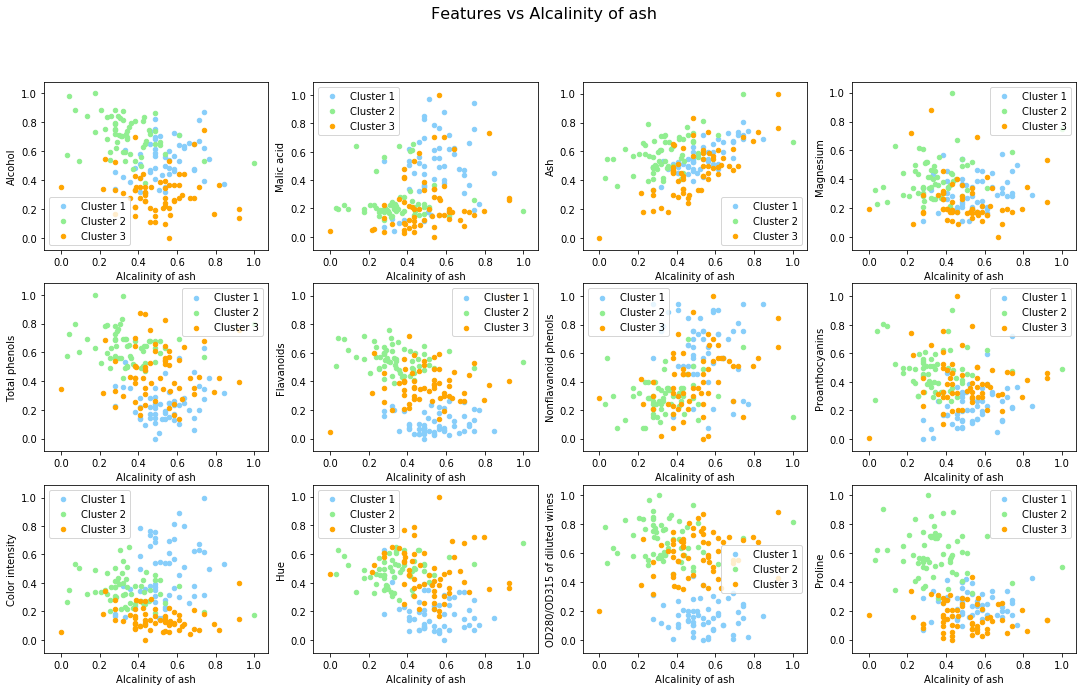

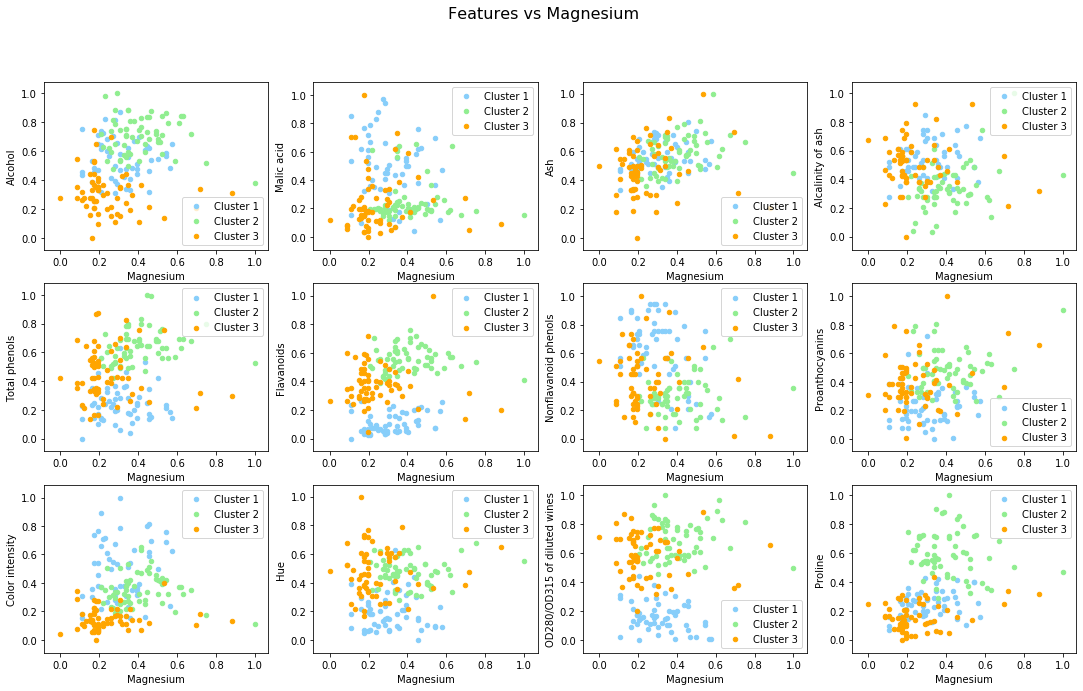

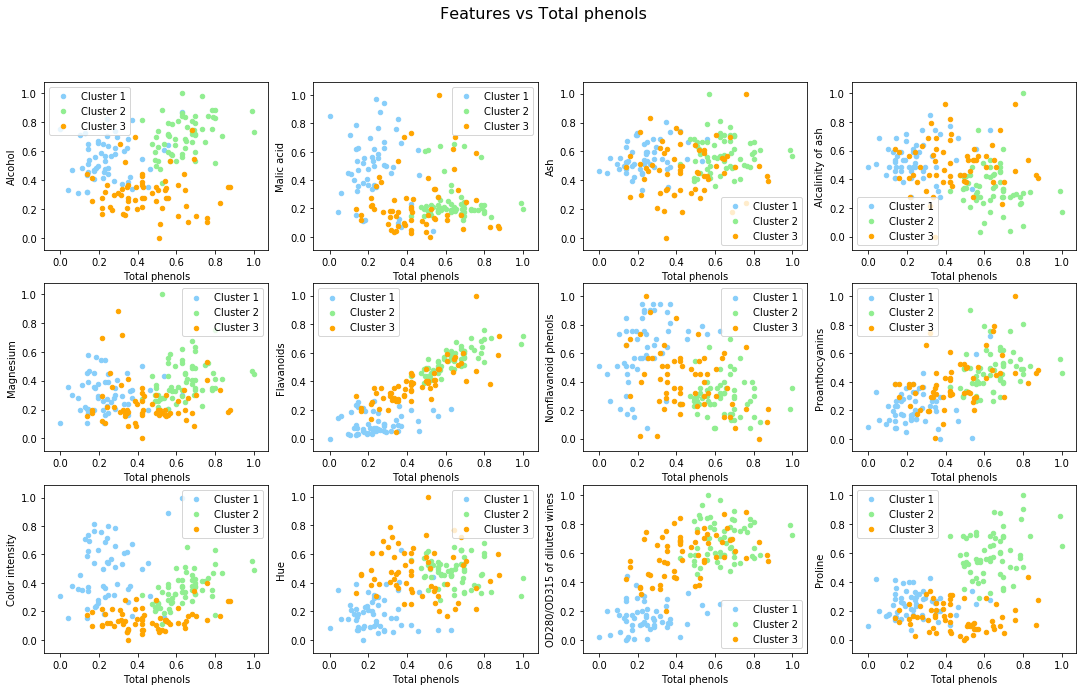

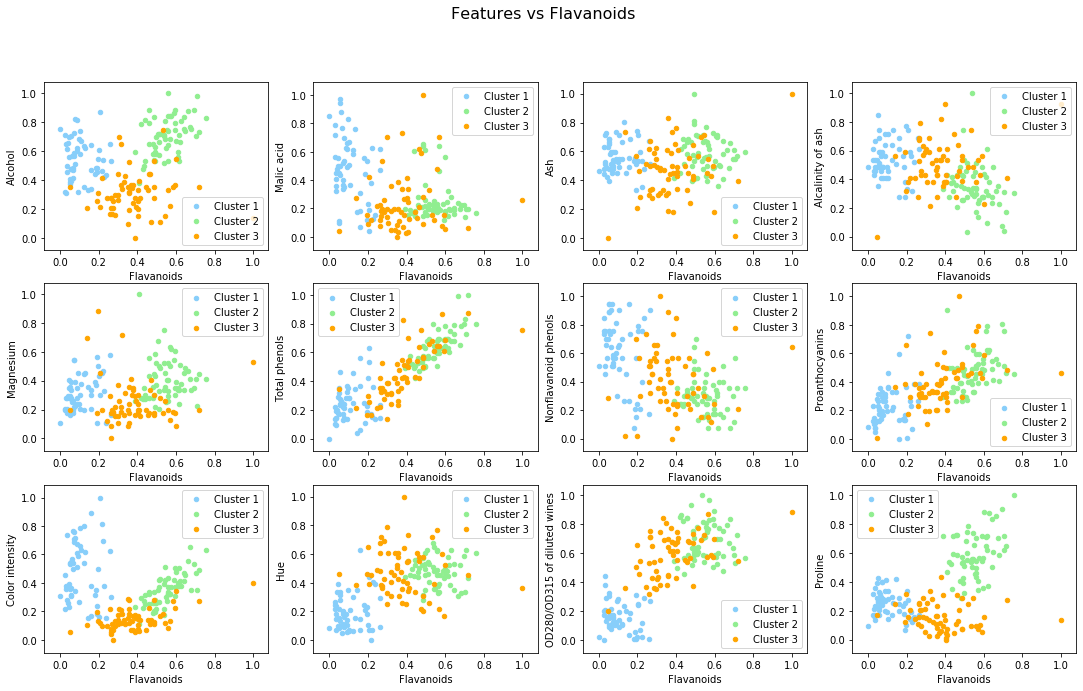

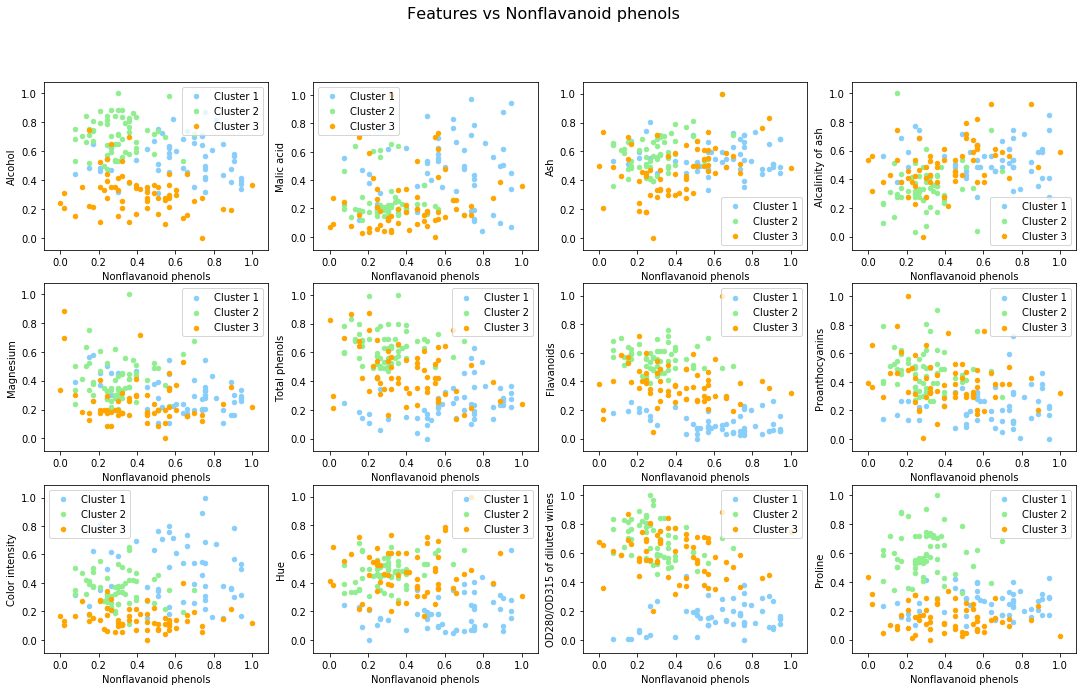

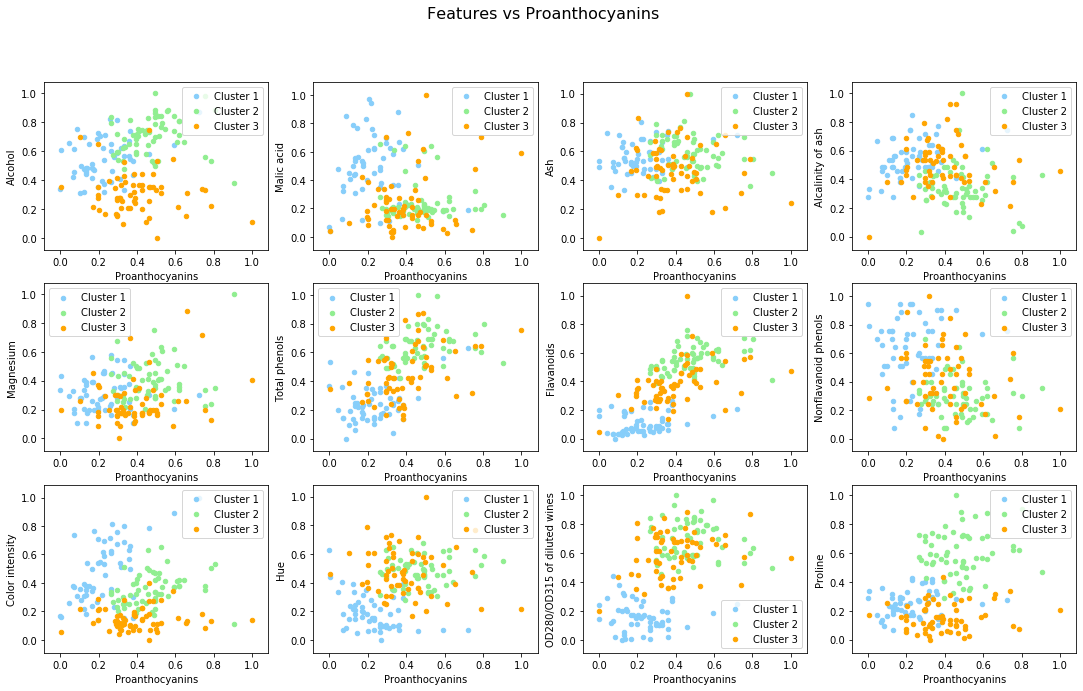

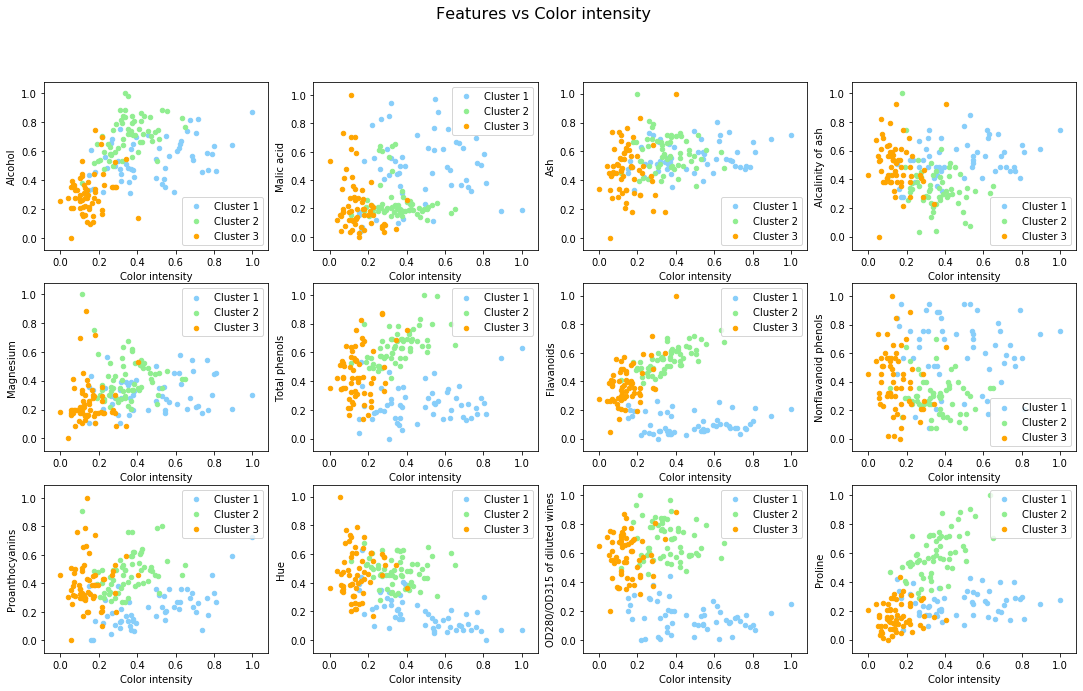

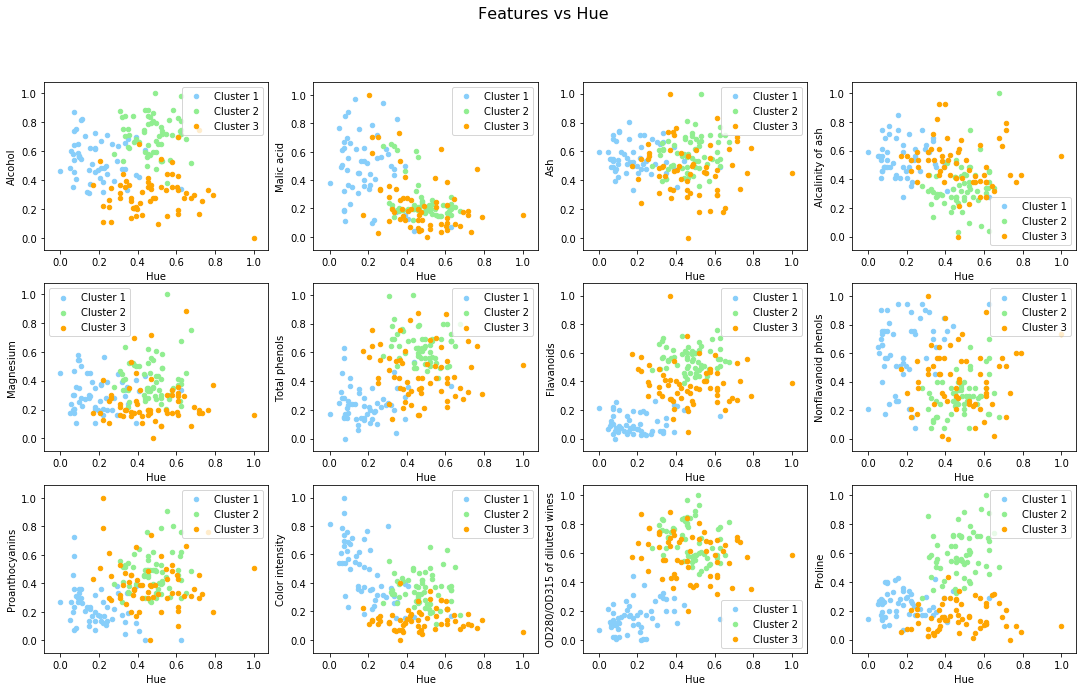

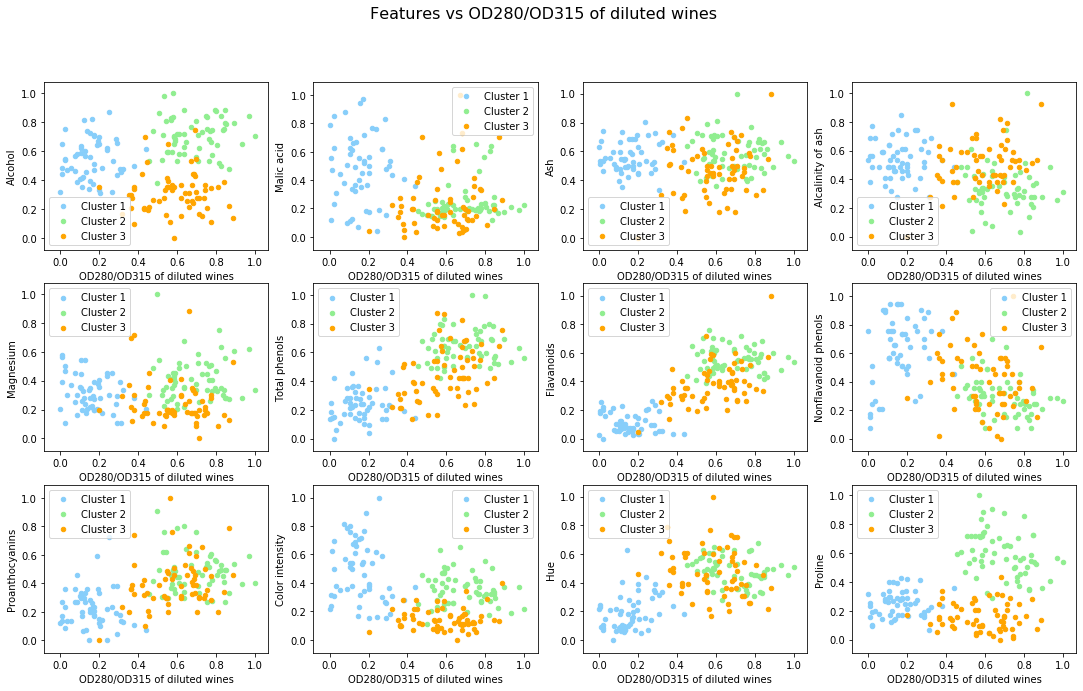

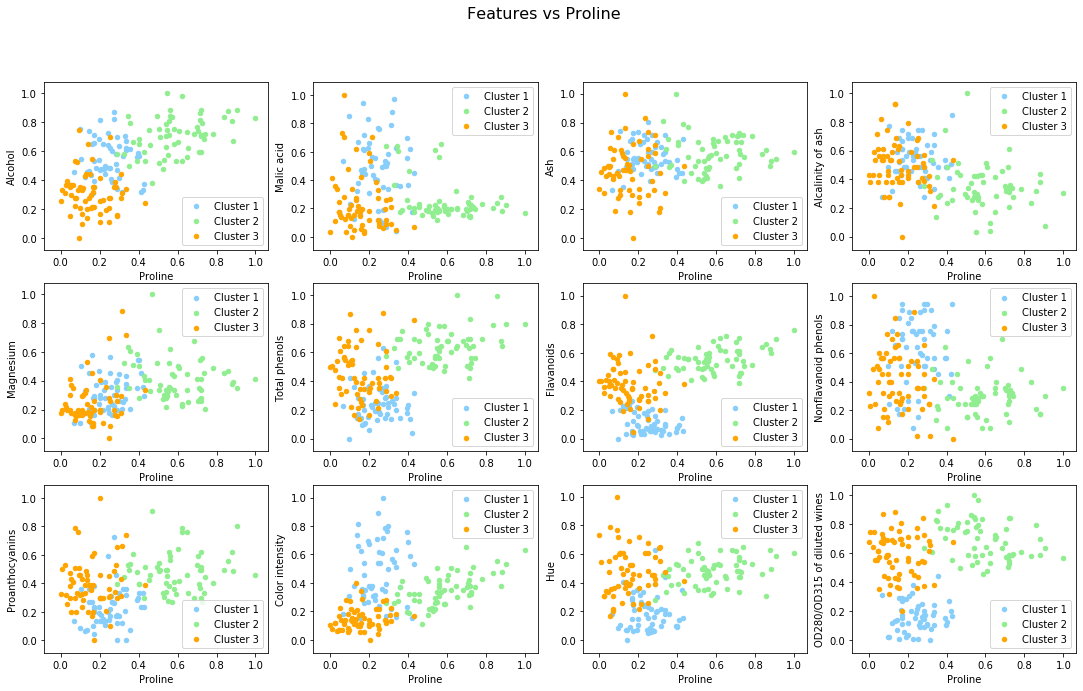

In [13]:
"""
Plot the distribution of the different features
"""

features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']

for feature in features:
    fig, axes = plt.subplots(nrows=3, ncols=4)
    i = 0
    for vs_feature in features:
        if vs_feature == feature:
            pass
        else:
            cluster[cluster['Cluster']==1].plot(kind='scatter', x=feature, y=vs_feature, color='lightskyblue', label='Cluster 1', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==2].plot(kind='scatter', x=feature, y=vs_feature, color='lightgreen', label='Cluster 2', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==3].plot(kind='scatter', x=feature, y=vs_feature, color='orange', label='Cluster 3', ax=axes[i//4,i%4])
            i += 1
            
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle('Features vs '+ feature, fontsize=16)
    plt.show()

What we discover is that the features important to divide in cluster more than "Proline" are "Flavonoids" and "Color Intensity".